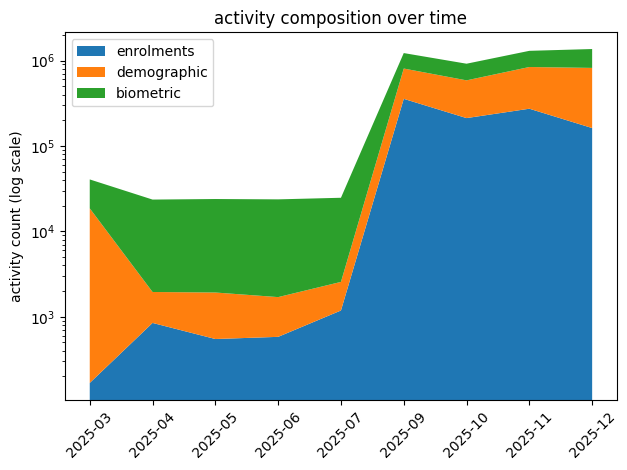

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
demographic_df=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
biometric_df=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

for df in [enrolment_df,demographic_df,biometric_df]:
    df["month"]=pd.to_datetime(df["date"]).dt.to_period("M").astype(str)

enrolments=enrolment_df.groupby("month").size()
demographic=demographic_df.groupby("month").size()
biometric=biometric_df.groupby("month").size()

timeline=pd.DataFrame({
    "enrolments":enrolments,
    "demographic":demographic,
    "biometric":biometric
}).fillna(0).sort_index()

plt.figure()
plt.stackplot(
    timeline.index,
    timeline["enrolments"],
    timeline["demographic"],
    timeline["biometric"],
    labels=["enrolments","demographic","biometric"]
)
plt.xticks(rotation=45)
plt.ylabel("activity count (log scale)")
plt.yscale("log")
plt.title("activity composition over time")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()
